In [1]:
from pathlib import Path

In [2]:
# Configure

IS_KAGGLE = False
INPUT_PATH = Path("/kaggle/input" if IS_KAGGLE else "D:/MS/PPNCKH/Data")
OUTPUT_PATH = Path("/kaggle/working" if IS_KAGGLE else "D:/MS/PPNCKH/Final/output")

RE_FEATURES_EXTRACTED = False

In [3]:
ROOT            = INPUT_PATH / "home-credit-credit-risk-model-stability"
TRAIN_DIR       = ROOT / "parquet_files" / "train"
TEST_DIR        = ROOT / "parquet_files" / "test"
MODEL_PATH      = OUTPUT_PATH / "model.pkl"
CELL_OUT_PATH   = OUTPUT_PATH / "output.txt"

In [4]:
SAMPLE_SUBMISSION = ROOT / "sample_submission.csv"
OUTPUT_SUBMISSION = OUTPUT_PATH / "submission.csv"

In [5]:
LIGHTGBM_PARAMS = {
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": "auc",
    "max_depth": 10,
    "learning_rate": 0.05,
    "max_bin": 255,
    "n_estimators": 50,
    "colsample_bytree": 0.8,
    "colsample_bynode": 0.8,
    "verbose": -1,
    "random_state": 42,
    "reg_alpha": 0.1,
    "reg_lambda": 10,
    "extra_trees":True,
    'num_leaves':64,
    "device": "gpu",
}

K_FOLDS = 2

In [6]:
%%capture cap --no-stderr
if 'cap' in globals():
    del cap
from data_preprocessor import DataPreprocessor
from model import Model
import submission

data_preprocessor = DataPreprocessor(train_dir=TRAIN_DIR, test_dir=TEST_DIR, saved_dir=OUTPUT_PATH, re_features_extracted=RE_FEATURES_EXTRACTED)
model = Model(model_params=LIGHTGBM_PARAMS, num_folds=K_FOLDS, output_dir=OUTPUT_PATH)

X_train, y_train, X_test, weeks = data_preprocessor.preprocess()
model.fit(X=X_train, y=y_train, weeks=weeks)
predictions = model.predict(X=X_test)
submission.make_submission(predictions=predictions, sample_submission_path=SAMPLE_SUBMISSION, output_path=OUTPUT_SUBMISSION)
model.save_model(MODEL_PATH)

--- Create dataframes:
Reading the saved features training data ...
Train data shape:	 (1526659, 376)
Reading the saved features test data ...
Test data shape:	 (10, 375)

--- Filter columns:
Train data shape:	 (1526659, 267)
Test data shape:	 (10, 266)

--- Training the model ...
--------------------------------------------------
Fold 1 ...
Train week range:  (1, 90)
Train shape:  (763869, 264)
Valid shape:  (762790, 264)
Fitting the model ...
Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.80403
Did not meet early stopping. Best iteration is:
[50]	valid_0's auc: 0.80403
Fold AUC score:  0.804029995928524
Plot saved. Check the file:  D:\MS\PPNCKH\Final\output\metrics_fold_1.png
--------------------------------------------------
Fold 2 ...
Train week range:  (0, 91)
Train shape:  (762790, 264)
Valid shape:  (763869, 264)
Fitting the model ...
Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.805748
Did not meet early s

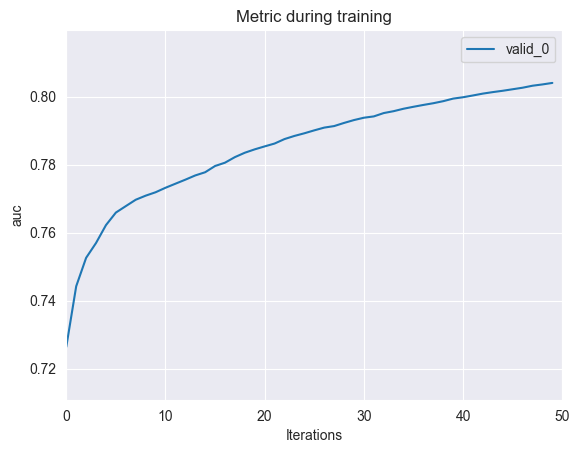

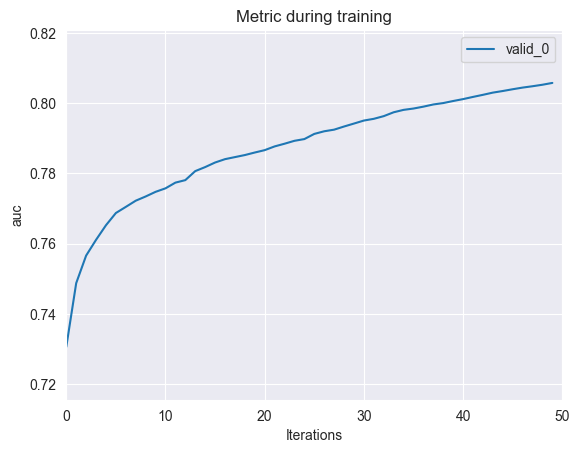

In [7]:
if CELL_OUT_PATH.exists():
    CELL_OUT_PATH.unlink()
with open(CELL_OUT_PATH, 'w') as f:
    f.write(cap.stdout)
cap()